In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

rd = pd.read_csv("river_data.csv")
rs = pd.read_csv("river_stations.csv")
wd = pd.read_csv("weather_data.csv")
ws = pd.read_csv("weather_stations.csv")
station_no_river_dusseldorf = "6335020"
station_no_river_cologne = "6335050"
station_no_weather_sollingen = "4741"
station_no_weather_cologne = "2968"

#saving the data size
rd_m, rd_n = rd.shape
rs_m, rs_n = rs.shape
wd_m, wd_n = wd.shape
ws_m, ws_n = ws.shape


# Read River Data

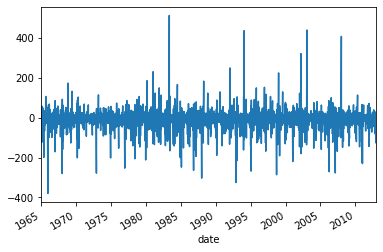

In [2]:
rd_c = pd.read_csv('stations/station_' + station_no_river_cologne + '_river_data.csv')
rd_c.date = pd.to_datetime(rd_c.date, format='%Y-%m-%d')
rd_c = rd_c.set_index('date')

rd_c.delta1.plot()

Checking the Correlation between water level and discharge at cologne

In [3]:
corrcoef_water_discharge_cologne = np.corrcoef(rd_c['water_level'], rd_c['discharge'])

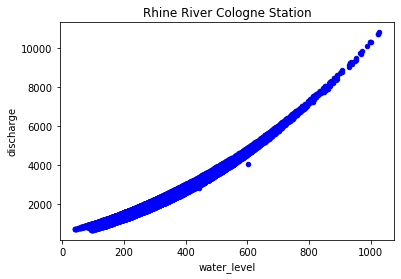

In [4]:
rd_c.plot(kind='scatter', x='water_level', y='discharge', color='blue')
plt.title("Rhine River Cologne Station")
plt.show()

# Read the Weather Data

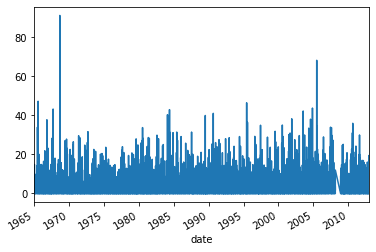

In [5]:
wd_c = pd.read_csv('weather_stations/station_' + station_no_weather_cologne + '_weather_data.csv')
wd_c.date = pd.to_datetime(wd_c.date, format='%Y-%m-%d')
wd_c = wd_c.set_index('date')

wd_c.RS.plot()

Combine the weather and river data at cologne

In [6]:
combine_df_c = pd.merge(rd_c, wd_c, how='inner', on=['date'])

In [7]:
combine_df_c[1090:1100]

,station_no,discharge,water_level,year_x,month_x,delta1,delta2,delta3,STATIONS_ID,RS,RSF,SH_TAG,NSH_TAG,year_y,month_y
date,,,,,,,,,,,,,,,
1968-06-20,6335050,2260.0,358.0,1968,6,11.0,9.0,4.0,2968,3.8,1.0,0.0,0.0,1968,6
1968-06-21,6335050,2200.0,350.0,1968,6,8.0,19.0,17.0,2968,17.4,1.0,0.0,0.0,1968,6
1968-06-22,6335050,2190.0,349.0,1968,6,1.0,9.0,20.0,2968,0.0,0.0,0.0,0.0,1968,6
1968-06-23,6335050,2190.0,349.0,1968,6,0.0,1.0,9.0,2968,7.5,1.0,0.0,0.0,1968,6
1968-06-24,6335050,2180.0,348.0,1968,6,1.0,1.0,2.0,2968,1.4,1.0,0.0,0.0,1968,6
1968-06-25,6335050,2240.0,356.0,1968,6,-8.0,-7.0,-7.0,2968,6.5,1.0,0.0,0.0,1968,6
1968-07-12,6335050,1880.0,305.0,1968,7,51.0,43.0,44.0,2968,0.0,0.0,0.0,0.0,1968,7
1968-07-13,6335050,1920.0,312.0,1968,7,-7.0,44.0,36.0,2968,8.9,1.0,0.0,0.0,1968,7
1968-07-14,6335050,1890.0,307.0,1968,7,5.0,-2.0,49.0,2968,7.0,1.0,0.0,0.0,1968,7


Adjust the combined data

In [8]:
columns = ['year_y', 'month_y']
combine_df_c.drop(columns, inplace=True, axis=1)

In [9]:
combine_df_c[1090:1100]

,station_no,discharge,water_level,year_x,month_x,delta1,delta2,delta3,STATIONS_ID,RS,RSF,SH_TAG,NSH_TAG
date,,,,,,,,,,,,,
1968-06-20,6335050,2260.0,358.0,1968,6,11.0,9.0,4.0,2968,3.8,1.0,0.0,0.0
1968-06-21,6335050,2200.0,350.0,1968,6,8.0,19.0,17.0,2968,17.4,1.0,0.0,0.0
1968-06-22,6335050,2190.0,349.0,1968,6,1.0,9.0,20.0,2968,0.0,0.0,0.0,0.0
1968-06-23,6335050,2190.0,349.0,1968,6,0.0,1.0,9.0,2968,7.5,1.0,0.0,0.0
1968-06-24,6335050,2180.0,348.0,1968,6,1.0,1.0,2.0,2968,1.4,1.0,0.0,0.0
1968-06-25,6335050,2240.0,356.0,1968,6,-8.0,-7.0,-7.0,2968,6.5,1.0,0.0,0.0
1968-07-12,6335050,1880.0,305.0,1968,7,51.0,43.0,44.0,2968,0.0,0.0,0.0,0.0
1968-07-13,6335050,1920.0,312.0,1968,7,-7.0,44.0,36.0,2968,8.9,1.0,0.0,0.0
1968-07-14,6335050,1890.0,307.0,1968,7,5.0,-2.0,49.0,2968,7.0,1.0,0.0,0.0


In [10]:
combine_df_c = combine_df_c[['station_no', 'STATIONS_ID', 'year_x', 'month_x', 'discharge', 'water_level','delta1','delta2','delta3','RS','RSF','SH_TAG','NSH_TAG']]

In [11]:
combine_df_c

,station_no,STATIONS_ID,year_x,month_x,discharge,water_level,delta1,delta2,delta3,RS,RSF,SH_TAG,NSH_TAG
date,,,,,,,,,,,,,
1965-01-01,6335050,2968,1965,1,1320.00,219.0,NaN,NaN,NaN,1.2,1.0,0.0,0.0
1965-01-02,6335050,2968,1965,1,1650.00,272.0,-53.0,NaN,NaN,0.3,1.0,0.0,0.0
1965-01-03,6335050,2968,1965,1,1950.00,315.0,-43.0,-96.0,NaN,0.1,1.0,0.0,0.0
1965-01-04,6335050,2968,1965,1,1870.00,304.0,11.0,-32.0,-85.0,0.0,7.0,0.0,0.0
1965-01-05,6335050,2968,1965,1,1870.00,304.0,0.0,11.0,-32.0,1.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,6335050,2968,2012,12,5988.73,701.0,10.0,14.0,-33.0,10.7,4.0,NaN,NaN
2012-12-28,6335050,2968,2012,12,5991.16,701.0,0.0,10.0,14.0,1.3,4.0,NaN,NaN
2012-12-29,6335050,2968,2012,12,6345.64,731.0,-30.0,-30.0,-20.0,0.1,4.0,NaN,NaN


save the combined data

In [153]:
#combine_df_c.to_csv(f'./cologne_combined_data.csv')

In [184]:
def define_X_y(df, pred_start, pred_end):
    head_df = df[df.index < pred_start]
    head_df.drop(['station_no', 'STATIONS_ID', 'year_x', 'month_x','RSF', 'SH_TAG', 'NSH_TAG'], axis=1, inplace=True)
    #head_df['RS_y'] = head_df.RS.shift(1)
    #head_df['RS_t'] = head_df.RS.shift(-1)
    print(head_df)
    
    X = head_df
    y1 = head_df.water_level.shift(-1)
    y2 = head_df.water_level.shift(-2)
    y3 = head_df.water_level.shift(-3)
    X = X[:-3]
    y1 = y1[:-3]
    y2 = y2[:-3]
    y3 = y3[:-3]
    return X, y1, y2, y3

In [ ]:
def X
X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=0)
regressor1 = LinearRegression()  
regressor.fit(X_train, y_train1) #training the algorithm

y_pred1 = regressor.predict(X_test)
y_pred1 = np.diff(y_pred1)
y_test1 = np.diff(y_test1)

X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=5)
regressor2 = LinearRegression()  
regressor2.fit(X_train, y_train1) #training the algorithm

y_pred2 = regressor.predict(X_test)
y_pred2 = np.diff(y_pred2)
y_test2 = np.diff(y_test2)

X_train, X_test, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=2)
regressor3 = LinearRegression()  
regressor3.fit(X_train, y_train3) #training the algorithm

y_pred3 = regressor.predict(X_test)
y_pred3 = np.diff(y_pred3)
y_test3 = np.diff(y_test3)

y_true = np.concatenate((y_test1, y_test2, y_test3), axis=None)
y_pred = np.concatenate((y_pred1, y_pred2, y_pred3), axis=None)

In [185]:
skip_missing_days = 16
full_range = pd.date_range(combine_df_c.index.min(), combine_df_c.index.max()+pd.Timedelta(days=1)) #TODO add last day!
combine_df_c = combine_df_c.reindex(full_range, fill_value=np.NaN)


next_gap = combine_df_c.water_level.isnull().idxmax()
tail_gap = next_gap + pd.Timedelta(days=skip_missing_days)

X, y1, y2, y3 = define_X_y(combine_df_c, next_gap, tail_gap)
X = np.nan_to_num(X, nan=0)
y1 = np.nan_to_num(y1, nan=0)
y2 = np.nan_to_num(y2, nan=0)
y3 = np.nan_to_num(y3, nan=0)

            discharge  water_level  delta1  delta2  delta3    RS
1965-01-01     1320.0        219.0     NaN     NaN     NaN   1.2
1965-01-02     1650.0        272.0   -53.0     NaN     NaN   0.3
1965-01-03     1950.0        315.0   -43.0   -96.0     NaN   0.1
1965-01-04     1870.0        304.0    11.0   -32.0   -85.0   0.0
1965-01-05     1870.0        304.0     0.0    11.0   -32.0   1.2
...               ...          ...     ...     ...     ...   ...
1965-04-12     2390.0        375.0     8.0    17.0    29.0   3.6
1965-04-13     2340.0        369.0     6.0    14.0    23.0   0.8
1965-04-14     2380.0        374.0    -5.0     1.0     9.0   0.0
1965-04-15     2460.0        384.0   -10.0   -15.0    -9.0  10.0
1965-04-16     2440.0        381.0     3.0    -7.0   -12.0   0.4

[106 rows x 6 columns]


/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
df = pd.DataFrame({'Actual1': y_test1.flatten(), 'Predicted1': y_pred1.flatten(), 'Actual2': y_test2.flatten(),
                   'Predicted2': y_pred2.flatten(), 'Actual3': y_test3.flatten(), 'Predicted3': y_pred3.flatten()})
df 


,Actual1,Predicted1,Actual2,Predicted2,Actual3,Predicted3
0,-138.0,-136.515972,165.0,160.219831,-92.0,-173.167284
1,83.0,111.617828,182.0,64.360658,-315.0,-102.009351
2,-35.0,-58.649586,-303.0,-188.268074,138.0,141.290723
3,-61.0,-62.413084,-47.0,-53.498013,197.0,8.517913
4,271.0,252.020338,485.0,437.159889,-188.0,4.668767
5,-69.0,-87.078006,-487.0,-431.989432,-78.0,-48.548429
6,-204.0,-167.566205,108.0,115.051228,41.0,12.884092
7,30.0,29.707258,-94.0,-112.427355,85.0,5.476290
8,66.0,56.413095,81.0,78.221903,-41.0,70.795302
9,-58.0,-47.342748,79.0,104.110238,8.0,-21.413275


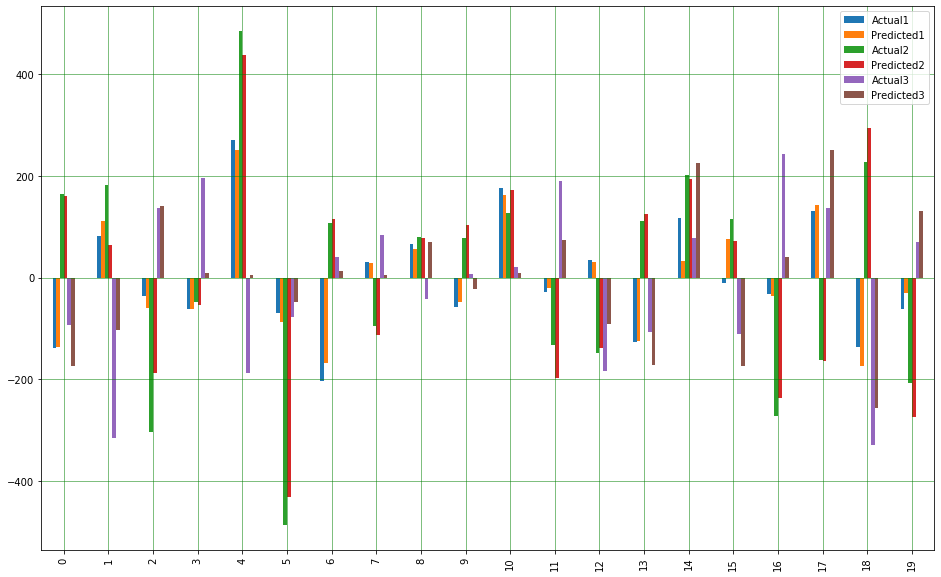

In [188]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Calculate R2 Score

In [189]:
r2_score(y_true, y_pred)

0.8081462654950519